In [1]:
#IMPORTING LIBRARIES
import pandas as pd
import numpy as np
import os
import pickle
import matplotlib.pyplot as plt
import scipy.stats as stats
import scipy as sp
from matplotlib.offsetbox import AnchoredText
from mpl_toolkits.axes_grid1 import make_axes_locatable
import warnings
warnings.filterwarnings('ignore')

In [2]:
#DATASET USED:
df = pd.read_csv('data/opp-stops_state.csv')
df = df.dropna()
#only use Texas and divide into races
tx = df.loc[df["state"] == "TX"]

In [3]:
counties =  pd.read_csv('2016_US_County_Level_Presidential_Results.csv')
counties = counties.dropna()
counties.head()

,Unnamed: 0,votes_dem,votes_gop,total_votes,per_dem,per_gop,diff,per_point_diff,state_abbr,county_name,combined_fips
0,0,93003.0,130413.0,246588.0,0.377159,0.52887,"37,410",15.17%,AK,Alaska,2013
1,1,93003.0,130413.0,246588.0,0.377159,0.52887,"37,410",15.17%,AK,Alaska,2016
2,2,93003.0,130413.0,246588.0,0.377159,0.52887,"37,410",15.17%,AK,Alaska,2020
3,3,93003.0,130413.0,246588.0,0.377159,0.52887,"37,410",15.17%,AK,Alaska,2050
4,4,93003.0,130413.0,246588.0,0.377159,0.52887,"37,410",15.17%,AK,Alaska,2060


In [4]:
"""counties['color'] = np.where(counties["per_dem"] > counties["per_gop"], "blue", "red")
counties = counties.loc[counties["state_abbr"] == "TX"]
colors = np.array(counties['color'])"""

counties['color'] = np.where(counties["per_dem"] > counties["per_gop"], "blue", "red")
counties = counties.loc[counties["state_abbr"] == "TX"]
#In df counties, keep only the counties for which we have the data
counties = counties.loc[counties["county_name"].isin(tx["subgeography"])]
colors = np.array(counties['color'])

In [5]:
tx_hit = tx[['subgeography','hit_rate','subject_race']]
tx_white = tx_hit.loc[tx_hit["subject_race"]== 'white']
tx_white['color'] = colors
tx_white_b = tx_white.loc[tx_white['color'] == 'blue']
tx_white_r = tx_white.loc[tx_white['color'] == 'red']
tx_black = tx_hit.loc[tx_hit["subject_race"]== 'black']
tx_black['color'] = colors
tx_black_b = tx_black.loc[tx_black['color'] == 'blue']
tx_black_r = tx_black.loc[tx_black['color'] == 'red']
tx_hisp = tx_hit.loc[tx_hit["subject_race"]== 'hispanic']
tx_hisp['color'] = colors
tx_hisp_b = tx_hisp.loc[tx_hisp['color'] == 'blue']
tx_hisp_r = tx_hisp.loc[tx_hisp['color'] == 'red']

"""
#In df counties, keep only the counties for which we have the data
counties = counties.loc[counties["county_name"].isin(tx_white["subgeography"])]
tx_hit = tx[['subgeography','hit_rate','subject_race']]
tx_white = tx_hit.loc[tx_hit["subject_race"]== 'white']
tx_white['color'] = colors
tx_white_b = tx_white.loc[tx_white['color'] == 'blue']
tx_white_r = tx_white.loc[tx_white['color'] == 'red']
tx_black = tx_hit.loc[tx_hit["subject_race"]== 'black']
tx_black['color'] = colors
tx_black_b = tx_black.loc[tx_black['color'] == 'blue']
tx_black_r = tx_black.loc[tx_black['color'] == 'red']
tx_hisp = tx_hit.loc[tx_hit["subject_race"]== 'hispanic']
tx_hisp['color'] = colors
tx_hisp_b = tx_hisp.loc[tx_hisp['color'] == 'blue']
tx_hisp_r = tx_hisp.loc[tx_hisp['color'] == 'red']"""


'\n#In df counties, keep only the counties for which we have the data\ncounties = counties.loc[counties["county_name"].isin(tx_white["subgeography"])]\ntx_hit = tx[[\'subgeography\',\'hit_rate\',\'subject_race\']]\ntx_white = tx_hit.loc[tx_hit["subject_race"]== \'white\']\ntx_white[\'color\'] = colors\ntx_white_b = tx_white.loc[tx_white[\'color\'] == \'blue\']\ntx_white_r = tx_white.loc[tx_white[\'color\'] == \'red\']\ntx_black = tx_hit.loc[tx_hit["subject_race"]== \'black\']\ntx_black[\'color\'] = colors\ntx_black_b = tx_black.loc[tx_black[\'color\'] == \'blue\']\ntx_black_r = tx_black.loc[tx_black[\'color\'] == \'red\']\ntx_hisp = tx_hit.loc[tx_hit["subject_race"]== \'hispanic\']\ntx_hisp[\'color\'] = colors\ntx_hisp_b = tx_hisp.loc[tx_hisp[\'color\'] == \'blue\']\ntx_hisp_r = tx_hisp.loc[tx_hisp[\'color\'] == \'red\']'

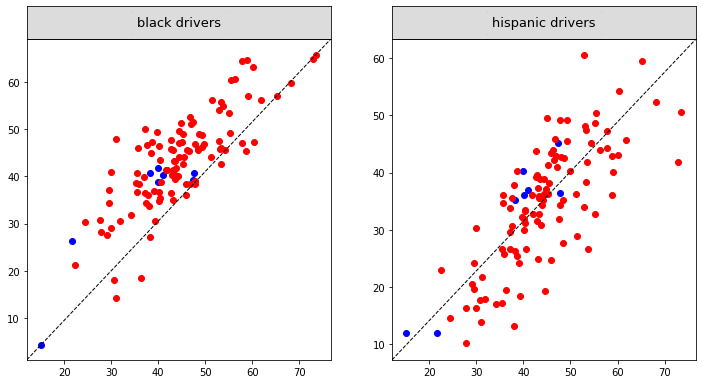

In [6]:
fig1, [ax1,ax2] = plt.subplots(1, 2,figsize=(12, 6.5))
ax1.scatter(tx_white_b['hit_rate']*100, tx_black_b['hit_rate']*100, c = 'blue')
ax1.scatter(tx_white_r['hit_rate']*100, tx_black_r['hit_rate']*100, c = 'red')
ax1.plot([0,1],[0,1], linestyle = '--', linewidth = 1, color='black',transform=ax1.transAxes)
ax2.scatter(tx_white_b['hit_rate']*100, tx_hisp_b['hit_rate']*100, c = 'blue')
ax2.scatter(tx_white_r['hit_rate']*100, tx_hisp_r['hit_rate']*100, c = 'red')
ax2.plot([0,1],[0,1], linestyle = '--', linewidth = 1, color='black',transform=ax2.transAxes)

for ax in [ax1,ax2]:
    divider = make_axes_locatable(ax)
    cax = divider.append_axes("top", size="10%", pad=0)
    cax.get_xaxis().set_visible(False)
    cax.get_yaxis().set_visible(False)
    cax.set_facecolor('gainsboro')
    at = AnchoredText('black drivers', loc=10, prop=dict(backgroundcolor='gainsboro', size=13, color='black'))
    cax.add_artist(at)
at = AnchoredText('hispanic drivers', loc=10, prop=dict(backgroundcolor='gainsboro', size=13, color='black'))
cax.add_artist(at)
